<a href="https://colab.research.google.com/github/kshitijagarwal183/Codsoft/blob/main/CREDIT%20CARD%20FRAUD%20DETECTION%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to Follow:
Preprocessing and Normalization
Handling Class Imbalance
Splitting the Dataset
Training a Classification Algorithm
Evaluating the Model's Performance

Preprocessing and Normalization

In [2]:
import pandas as pd

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51591 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51591 non-null  int64  
 1   V1      51591 non-null  float64
 2   V2      51591 non-null  float64
 3   V3      51591 non-null  float64
 4   V4      51591 non-null  float64
 5   V5      51591 non-null  float64
 6   V6      51591 non-null  float64
 7   V7      51591 non-null  float64
 8   V8      51591 non-null  float64
 9   V9      51591 non-null  float64
 10  V10     51591 non-null  float64
 11  V11     51590 non-null  float64
 12  V12     51590 non-null  float64
 13  V13     51590 non-null  float64
 14  V14     51590 non-null  float64
 15  V15     51590 non-null  float64
 16  V16     51590 non-null  float64
 17  V17     51590 non-null  float64
 18  V18     51590 non-null  float64
 19  V19     51590 non-null  float64
 20  V20     51590 non-null  float64
 21  V21     51590 non-null  float64
 22

(None,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V2

we'll address the class imbalance issue. Since fraudulent transactions (Class 1) are likely to be significantly fewer than genuine transactions (Class 0), we'll need to balance the classes. We can use techniques like oversampling the minority class or undersampling the majority class. Let's explore the class distribution first and then apply the appropriate technique.

In [3]:
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = data.isnull().sum().sum()

# Normalize the 'Amount' and 'Time' columns
scaler = StandardScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

# Display the first few rows of the normalized dataset
normalized_data_head = data.head()

missing_values, normalized_data_head


(20,
        Time        V1        V2        V3        V4        V5        V6  \
 0 -2.228635 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1 -2.228635  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
 2 -2.228559 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
 3 -2.228559 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4 -2.228483 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
 
          V7        V8        V9  ...       V21       V22       V23       V24  \
 0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
 1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
 2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
 3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
 4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
 
         V25       V26       V27       V28    Amo

Synthetic Minority Over-sampling Technique

<ipython-input-4-2b46d88c888a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


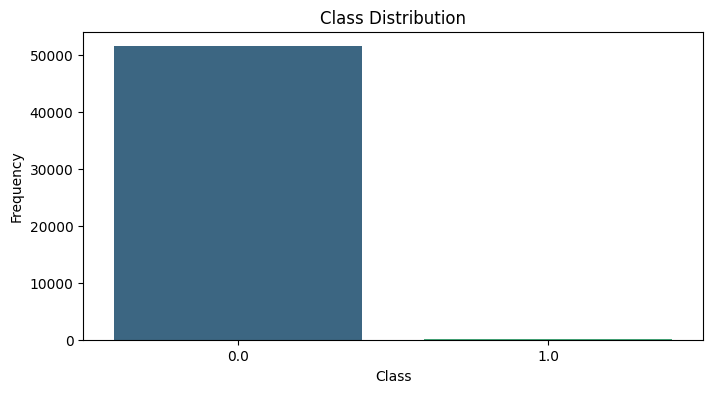

Class
0.0    51440
1.0      150
Name: count, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the class distribution
class_counts = data['Class'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

class_counts

Apply SMOTE: Use SMOTE to oversample the minority class.
Split Data: Split the balanced dataset into training and testing sets.
Train Model: Train a classification model (e.g., logistic regression or random forest).
Evaluate Model: Evaluate the model's performance using metrics like precision, recall, and F1-score.

In [8]:
# Check for NaN values in the target variable
nan_values_in_y = y.isna().sum()

# If there are NaN values, remove them
if nan_values_in_y > 0:
    data = data.dropna(subset=['Class'])
    X = data.drop('Class', axis=1)
    y = data['Class']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10288
         1.0       1.00      1.00      1.00     10288

    accuracy                           1.00     20576
   macro avg       1.00      1.00      1.00     20576
weighted avg       1.00      1.00      1.00     20576



In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check the distribution of the resampled dataset
resampled_class_counts = y_resampled.value_counts()

resampled_class_counts


Class
0.0    51440
1.0    51440
Name: count, dtype: int64